## Lab 2. Text Normalization (cleaning)

În funcție de task-ul pe care îl avem de realizat, putem alege una sau mai multe modalități de curățare a textului:
- Transformarea textului în litere mici
- Eliminarea cifrelor și numerelor (sau transformarea lor în cuvinte)
- Eliminarea link-urilor
- Eliminarea emoticoanelor ( :) :D) și a emoji-urilor (💙 🐱)
- Eliminarea punctuației
- Eliminarea stopwords
- Stemming/Lematizare
- Tokenizare

Vom folosi setul de date `twitter_samples` din `nltk` (https://www.nltk.org/), care conține tweeturi pozitive și negative. Vom folosi mai departe doar tweeturile pozitive.



In [ ]:
import nltk
nltk.download('twitter_samples')

In [ ]:
from nltk.corpus  import twitter_samples
tweets = twitter_samples.strings('positive_tweets.json')
tweets = tweets[500:520]
tweets

### Transformarea textului în litere mici

In [ ]:
tweets_lower = [tweet.lower() for tweet in tweets]
tweets_lower

### Eliminarea cifrelor și numerelor (sau transformarea lor în cuvinte)

Eliminarea cifrelor folosind regex `re`

In [ ]:
import re

tweets_no_digits = [re.sub(r'\d+', '', tweet) for tweet in tweets_lower]
tweets_no_digits

Convertirea cifrelor în numere folosind `num2words`

In [ ]:
# ! pip install num2words

In [ ]:
from num2words import num2words

tweets_num2words = []
for tweet in tweets_lower:
    tweets_num2words.append(' '.join([num2words(word) if word.isdigit() else word for word in tweet.split()]))

tweets_num2words

### Eliminarea link-urilor

In [ ]:
tweets_no_links = [re.sub(r'http\S+', '', tweet) for tweet in tweets_no_digits]
tweets_no_links

### Eliminarea emoticoanelor ( :) :D) și a emoji-urilor (💙 🐱)

Eliminarea emoticoanelor folosind regexul din [ nltk Twitter Tokenizer](https://github.com/nltk/nltk/blob/develop/nltk/tokenize/casual.py)

In [ ]:
emoticon_string = r"""
    (?:
      [<>]?
      [:;=8]                     # eyes
      [\-o\*\']?                 # optional nose
      [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth
      |
      [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth
      [\-o\*\']?                 # optional nose
      [:;=8]                     # eyes
      [<>]?
      |
      </?3                       # heart
    )"""
    
emoticon_re = re.compile(emoticon_string, re.VERBOSE | re.I | re.UNICODE)
tweets_no_emoticons = [re.sub(emoticon_re, '', tweet) for tweet in tweets_no_links]
tweets_no_emoticons

Eliminarea emoji-urilor folosind `emoji` [library](https://github.com/carpedm20/emoji)

In [ ]:
# ! pip install emoji

`get_emoji_regexp()` returnează un regex care cuprinde toate emoji-urile.

In [ ]:
import emoji

emoji_re = emoji.get_emoji_regexp()

tweets_no_emoji = [re.sub(emoji_re,'', tweet) for tweet in tweets_no_emoticons]
tweets_no_emoji

### Eliminarea hashtag-urilor și a mențiunilor

In [ ]:
tweets_no_hashtags = [re.sub(r'#[a-zA-Z0-9_]+','', tweet) for tweet in tweets_no_emoji]
tweets_no_hashtags

In [ ]:
tweets_no_mentions = [re.sub(r'@[a-zA-Z0-9_]+','', tweet) for tweet in tweets_no_hashtags]
tweets_no_mentions

Eliminăm spațiile multiple dintre cuvinte

In [ ]:
tweets_no_spaces = [re.sub(r'\s+', ' ', tweet).strip() for tweet in tweets_no_mentions]
tweets_no_spaces

### Tokenizare

- La nivel de propoziție: putem împărți un text în propoziții după punctuație, sau folosind [nltk.sent_tokenize](https://www.nltk.org/api/nltk.tokenize.html)

- La nivel de cuvânt: putem împărți după spațiu, sau să folosim [nltk.word_tokenize](https://www.nltk.org/api/nltk.tokenize.html)

Tokenizare la nivel de popoziție folosind regex



In [ ]:
twitter_sent_tokenized = [re.split('(?<=[.!?])\s+', tweet) for tweet in tweets_no_spaces]
twitter_sent_tokenized

Folosind `nltk.sent_tokenize`

Mai întâi trebuie să downloadăm punctuația din `nltk`

In [ ]:
nltk.download('punkt')

In [ ]:
from nltk import sent_tokenize

twitter_sent_tokenized = [nltk.sent_tokenize(tweet) for tweet in tweets_no_spaces]
twitter_sent_tokenized

Tokenizare la nivel de cuvânt după spații

In [ ]:
for tweet_list in twitter_sent_tokenized:
    print([tweet.split() for tweet in tweet_list])

Tokenizare la nivel de cuvânt folosind `nltk.word_tokenize`

In [ ]:
from nltk import word_tokenize

twitter_word_tokenized = [word_tokenize(tweet) for tweet in tweets_no_spaces]
twitter_word_tokenized

### Eliminarea punctuației

Folosind regex

In [ ]:
tweets_no_punct = [re.sub(r'[^\w\s]', '', tweet) for tweet in tweets_no_spaces]
tweets_no_punct

Folosind `string.punctuation()`

In [ ]:
import string

string.punctuation

Traducem fiecare semn de punctuație în ' '.

In [ ]:
tweets_no_punct = [tweet.translate(str.maketrans('', '', string.punctuation)) for tweet in tweets_no_spaces]
tweets_no_punct

Tokenizare la nivel de cuvânt după eliminarea punctuației.

In [ ]:
from nltk import word_tokenize

twitter_word_tokenized = [word_tokenize(tweet) for tweet in tweets_no_punct]
twitter_word_tokenized

Aveti grija la cazurile de tipul "unu,doi". Daca eliminati punctuatia direct, cele doua cuvinte vor fi concatenate obtinand un singur cuvant "unudoi". O alternativa ar fi sa inlocuim mai intai toate caracterele de punctuatie cu spatiu, apoi sa aplicam inca o data metoda de contractie a spatiilor.

In [ ]:
tweets_no_punct = [re.sub(r'[^\w\s]', ' ', tweet) for tweet in tweets_no_spaces]
tweets_no_punct = [re.sub(r'\s+', ' ', tweet) for tweet in tweets_no_punct]
tweets_no_punct

### Eliminarea stopwords

![stopwords.jpg](https://user.oc-static.com/upload/2021/01/06/16099626487943_P1C2.png) 

Stopwords-urile sunt cele mai folosite cuvinte din limba engleza si au valoare sintactic morfologica, dar nu au si una semantica.
Primele 4 stopwords-uri ale limbii engleze in ordinea aparitiei lor in limba: the, of, and, to.  
Cele mai multe sunt pronume, prepozitii sau conjuctii. 

[The Zipf Law](https://www.youtube.com/watch?v=fCn8zs912OE) afirma ca daca notam $x$ = numarul de aparitii a lui "the", atunci numarul de aparitii al lui "of" va fi foarte apropiat de $\frac{x}{2}$, al lui "and", de $\frac{x}{3}$, al celui de-al n-lea cu $\frac{x}{n}$ (distributia de probabilitati Pareto).

Eliminare stopwords folosind `nltk`

In [ ]:
nltk.download('stopwords')

In [ ]:
from nltk.corpus import stopwords

stop_words_nltk = set(stopwords.words('english'))
print(len(stop_words_nltk))
print(stop_words_nltk)

In [ ]:
# flatten the lists
all_words = [word for sent in twitter_word_tokenized for word in sent]
all_words[:10]

In [ ]:
all_words_without_stops = [word for word in all_words if word not in stop_words_nltk]
all_words_without_stops[:10]

Eliminare stopwords folosind `spacy`

In [ ]:
# ! python -m spacy download en_core_web_sm

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
stop_words_spacy = nlp.Defaults.stop_words
print(len(stop_words_spacy))
print(stop_words_spacy)

In [ ]:
all_words_without_stops = [word for word in all_words if word not in stop_words_spacy]
all_words_without_stops[:10]

Putem vizualiza distributia stopwords-urilor folosind matplolib sau wordcloud.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
tweets_stopwords = [word for word in all_words if word in stop_words_spacy]
values, frequencies = np.unique(tweets_stopwords, return_counts=True)
stopwords_dict = {value: freq for value, freq in zip(values, frequencies)}

plt.figure(figsize=(25, 10))
plt.bar(values, frequencies, orientation='vertical')
plt.show()

In [ ]:
# !pip install wordcloud

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=50, max_words=1000, background_color="white")
wordcloud_picture = wordcloud.generate_from_frequencies(stopwords_dict)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Lematizare/Stemming

Au rolul de a elimina inflexiunile cuvintelor: acele caractere care pot ingloba:
- persoana unui verb, in romana: voi cauta**ți** - persoana a2a plural
- timpul unui verb, in romana: voi cauta**seră**ți - mai mult ca perfectul
- etc.

![1_HLQgkMt5-g5WO5VpNuTl_g.jpeg](https://miro.medium.com/max/564/1*HLQgkMt5-g5WO5VpNuTl_g.jpeg)

## Lematizarea
Aduce cuvintele la forma lor din dictionar.

"Lemmatization is the process where we take individual tokens from a sentence and we try to reduce them to their base form. The process that makes this possible is having a vocabulary and performing morphological analysis to remove inflectional endings. The output of the lemmatization process (as shown in the figure above) is the lemma or the base form of the word. For instance, a lemmatization process reduces the inflections, "am", "are", and "is", to the base form, "be". Take a look at the figure above for a full example and try to understand what it's doing.

Lemmatization is helpful for normalizing text for text classification tasks or search engines, and a variety of other NLP tasks such as sentiment classification. It is particularly important when dealing with complex languages like Arabic and Spanish." ([sursa](https://colab.research.google.com/github/dair-ai/notebooks/blob/master/_notebooks/2020-03-19-nlp_basics_tokenization_segmentation.ipynb#scrollTo=dcaLqxPX5CJa))

## Pros:
- rezultatele sunt cuvinte existente in limba

## Cons
- procesul de cautare poate fi costisitor dpdv. computational
- limba este intr-o continua evolutie, iar de cele mai multe ori, dictionarele nu "tin pasul" cu toate cuvintele noi aparute sau imprumutate

## Stemming
Aplica algoiritmi ce folosesc automate finite (remember LFA). Multe dintre ele sunt scrise in limbajul [Snowball](http://snowball.tartarus.org/).

"Stemming is just a simpler version of lemmatization where we are interested in stripping the suffix at the end of the word. When stemming we are interesting in reducing the inflected or derived word to it's base form. Take a look at the figure above to get some intuition about the process.

Both the stemming and the lemmatization processes involve morphological analysis where the stems and affixes (called the morphemes) are extracted and used to reduce inflections to their base form. For instance, the word cats has two morphemes, cat and s, the cat being the stem and the s being the affix representing plurality." ([sursa](https://colab.research.google.com/github/dair-ai/notebooks/blob/master/_notebooks/2020-03-19-nlp_basics_tokenization_segmentation.ipynb#scrollTo=dcaLqxPX5CJa))

## Pros:
- este mai rapida ca lematizarea
- se adapteaza mai usor la cuvinte noi aparute in limba

## Cons
- rezultatele nu sunt intotdeauna, cuvinte existente in limba


In [ ]:
doc = nlp("Apples and oranges are similar boots and hippos aren't")
for word in doc:
    print(word, '=>', word.lemma_)

In [ ]:
# spaCy doesn't support stemming so for this part we are going to use NLTK, which is another fantastic Python NLP library.
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer(language='english')
doc = 'I prefer not to argue'
for token in doc.split(" "):
    print(token, '=>' , stemmer.stem(token))

Pentru procesarea datelor din social media putem folosi și librării dedicate, cum ar fi `Preprocessor`: https://github.com/s/preprocessor

Collocations: in functie de context, putem analiza din toate n-gramele (de cuvinte sau caractere) cel mai probabile sa apara impreuna.

Exemlu: bigrama - pereche de cuvinte cu sanse mari sa coexiste:
('Jegar', 'Sahadutha'), ('Salt', 'Sea'), ('aromatic', 'resin').

Putem aplica cateva functii din pachetul [collocations](https://www.nltk.org/howto/collocations.html) pe cuvintele gasite pe twitter, pentru a gasi top 15 bigrame folosind [Pointwise Mutual Information](https://en.wikipedia.org/wiki/Pointwise_mutual_information).

In [ ]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
bigram_measures = BigramAssocMeasures()
colloc_founder = BigramCollocationFinder.from_words(all_words)

bigram_results = colloc_founder.nbest(bigram_measures.pmi, 15)
bigram_results

## Unidecode 
Aduce caracterele utf8 la cea mai apropiata forma ASCII a lor. Este utila atat  pentru inlocuirea diacriticilor limbii romane, cat si pentru a gasi un echivalent pentru 'romanizarea' caracterele asiatice (desi obtine rezultate diferite de Hepburn).

In [ ]:
!pip install Unidecode

In [ ]:
from unidecode import unidecode
unidecode('Leneşul mai mult aleargă, scumpul mai mult păgubeşte')

In [ ]:
unidecode('北京')

# TASK:

###Deadline: 10 martie ora 23:59.
###Formular pentru trimiterea temei: https://forms.gle/kMcWxv8e39wwXy1W7.


Folosind datasetul urmator, https://github.com/ancatache/LaRoSeDa/tree/main/data - o colectie de review-uri pentru produse in romana, rezolvati urmatoarele cerinte:

1. Curatati si normalizati corpus-ul aplicand urmatoarele operatiii:

    a) afisati caracterele diferite de literele mici ale alfabetului englez

    b) transformati numerele in cuvinte folosind num2words   

    c) eliminati linkurile si alte referinte

    d) curatati-l de semnele de punctuatie

    e) impartiti textele in cuvinte (tokens), va recomandam sa folositi `spacy` incarcand unul din modelele pentru limba romana (https://spacy.io/models/ro)

    f) eliminati stopwords  

    g) aplicati stemming  

    h) aplicati lematizare peste cuvintele obtinute la punctul f. Comparand cu rezultatele de la punctul g, afisati top 15 cuvinte pentru care stemul este diferit de lema, sortate descrescator dupa numarul de caractere prin care stemul difera de lema.

    i) cautati top 20 trigrame (collocations)


2. Calculati frecventele de aparitie ale fiecarui token la punctul e) si punctul g). Plotati-le cum doriti, prin wordcloud sau plotbar. Ce diferente observati? (intrucat numarul de cuvinte distincte poate fi mare, puteti plota informatii doar despre cele mai frecvente N cuvinte)


3. Plotati distributia numarului de tokens per review (nr. de reviews vs. nr. de tokens), atat pentru review-urile negative, cat si, separat, pentru cele pozitive. Ce observati?

In [1]:
# incarc datele
import json
positive = json.loads(open("positive_reviews.json", "r").read())["reviews"]
negative = json.loads(open("negative_reviews.json", "r").read())["reviews"]

# pentru simplitate la procesare, le concatenam, si tinem minte cate sunt pozitive
nr_positive_reviews = len(positive)
all_reviews = positive + negative

# vedem cum arata un review positiv
print(f"Review positiv:\n{positive[0]}")
# vedem un review negativ
print(f"Review negativ:\n{negative[0]}")

Review positiv:
{'index': '1', 'title': 'Super - exceptional raport calitate-pret', 'content': 'am analizat la sange toate bratarile de fitness si smartwatch-urile de pe piata de pana la 1.000 lei (bugetul maxim alocat de mine pentru aceasta investitie) si pot sa spun ca acesta avea cele mai pozite review-uri mai peste tot.... alternativa era un apple watch, al carui baterie nu tinea mult din ce am inteles (in jur de 1 zi jumatate).    despre ceas:    pro:   - l-am pus la incarcat in a 4-a zi, cu mentiunea ca inca mai avea 20% baterie (m-ar mai fi tinut o zi);  - pulsul este foarte precis - am testat comparativ cu un tensiometru si au aparut diferente de 1-2 batai pe minut (ceea ce este foarte bine);  - pasii sunt cat de cat corecti, cu o eroare de pana la 5% maximum, insa nu am stat sa verific fix pe fix sa vad daca e asa sau nu, aceasta fiind doar o estimare;  - alergatul il inregistreaza cum trebuie, la fel si exercitiile (le-am introdus la categoria "workout", insa sunt sigura ca s

1. Curatati si normalizati corpus-ul aplicand urmatoarele operatiii:

    a) afisati caracterele diferite de literele mici ale alfabetului englez

In [2]:
import re
from tqdm import tqdm

caractere_non_litera_mica = set()

def cauta_caractere_non_litera(s: str):
    """
        Cauta si adauga in `caractere_non_litera_lica` 
    """
    # daca voiam doar litere mici, am fi putut pune [a-z]
    de_adaugat = re.sub(r"\w", '', s)
    for i in de_adaugat:
        caractere_non_litera_mica.add(i)

# procesez toate stringurile
for i in tqdm(all_reviews):
    cauta_caractere_non_litera(i["title"])
    cauta_caractere_non_litera(i["content"])

print(f"Caractere diferite de litere mici: {caractere_non_litera_mica}")

100%|██████████| 15000/15000 [00:00<00:00, 29190.38it/s]

Caractere diferite de litere mici: {'>', '=', '̇', '×', '~', '@', '↓', '☆', '✌', ' ', '+', '¿', '&', '️', '"', '—', '®', ':', '<', '€', '•', '☺', '„', '‘', '.', '❤', '\\', '»', '¡', '★', '`', '|', '^', ')', '–', '°', '™', '-', '！', '”', '▪', '{', '̶', '/', ';', '«', '?', '#', '⭐', '“', '%', '→', '…', '[', ',', '$', '✓', '(', '’', '!', '*', ']', '}', '£', "'", '⛤'}


b) transformati numerele in cuvinte folosind num2words   

In [3]:
import num2words

def convert_str_add_nums(s: str) -> str:
    """
        Changes numbers to str in s
    """
    # magine neagra
    # jk, aplic un regex peste o functie lambda a matchului
    return re.sub(r'\d+', lambda s: num2words.num2words(s.group(), lang='ro'), s)

# fixam toate reviewurile
for i in tqdm(all_reviews):
    i["title"] = convert_str_add_nums(i["title"])
    i["content"] = convert_str_add_nums(i["content"])


print(f"Continut nou: {all_reviews[0]['content']}")

100%|██████████| 15000/15000 [00:13<00:00, 1121.58it/s]

Continut nou: am analizat la sange toate bratarile de fitness si smartwatch-urile de pe piata de pana la unu.zero lei (bugetul maxim alocat de mine pentru aceasta investitie) si pot sa spun ca acesta avea cele mai pozite review-uri mai peste tot.... alternativa era un apple watch, al carui baterie nu tinea mult din ce am inteles (in jur de unu zi jumatate).    despre ceas:    pro:   - l-am pus la incarcat in a patru-a zi, cu mentiunea ca inca mai avea douăzeci% baterie (m-ar mai fi tinut o zi);  - pulsul este foarte precis - am testat comparativ cu un tensiometru si au aparut diferente de unu-doi batai pe minut (ceea ce este foarte bine);  - pasii sunt cat de cat corecti, cu o eroare de pana la cinci% maximum, insa nu am stat sa verific fix pe fix sa vad daca e asa sau nu, aceasta fiind doar o estimare;  - alergatul il inregistreaza cum trebuie, la fel si exercitiile (le-am introdus la categoria "workout", insa sunt sigura ca si la celelalte functioneaza ok;  - somnul il monitorizeaza 

c) eliminati linkurile si alte referinte

In [4]:
def remove_links_and_refs(s: str) -> str:
    """
        removes links (https....)
    """
    return re.sub(r'http\S+', '', s)

for i in tqdm(all_reviews):
    i["title"] = remove_links_and_refs(i["title"])
    i["content"] = remove_links_and_refs(i["content"])

print(f"Continut nou: {all_reviews[0]['content']}")

100%|██████████| 15000/15000 [00:00<00:00, 183602.09it/s]

Continut nou: am analizat la sange toate bratarile de fitness si smartwatch-urile de pe piata de pana la unu.zero lei (bugetul maxim alocat de mine pentru aceasta investitie) si pot sa spun ca acesta avea cele mai pozite review-uri mai peste tot.... alternativa era un apple watch, al carui baterie nu tinea mult din ce am inteles (in jur de unu zi jumatate).    despre ceas:    pro:   - l-am pus la incarcat in a patru-a zi, cu mentiunea ca inca mai avea douăzeci% baterie (m-ar mai fi tinut o zi);  - pulsul este foarte precis - am testat comparativ cu un tensiometru si au aparut diferente de unu-doi batai pe minut (ceea ce este foarte bine);  - pasii sunt cat de cat corecti, cu o eroare de pana la cinci% maximum, insa nu am stat sa verific fix pe fix sa vad daca e asa sau nu, aceasta fiind doar o estimare;  - alergatul il inregistreaza cum trebuie, la fel si exercitiile (le-am introdus la categoria "workout", insa sunt sigura ca si la celelalte functioneaza ok;  - somnul il monitorizeaza 

d) curatati-l de semnele de punctuatie

In [5]:
re.sub(r'[^\w^\s]|_', ' ', "Hello_wer-123")

'Hello wer 123'

In [6]:
import unidecode

def remove_punctuation(s: str) -> str:
    """
        removes punctuation
    """
    # inlocuim punctuatiile cu spatii (le vom elimina dupa daca sunt dubluri)
    # daca nu punem spatii, chestii cum ar fi "du-te" se transforma in "dute".
    no_punctuation = re.sub(r'[^\w^\s]|_', ' ', s)
    no_punctuation = no_punctuation.lower()
    return no_punctuation

for i in tqdm(all_reviews):
    i["title"] = remove_punctuation(i["title"])
    i["content"] = remove_punctuation(i["content"])

print(f"Continut nou: {all_reviews[0]['content']}")

100%|██████████| 15000/15000 [00:00<00:00, 87022.73it/s]

Continut nou: am analizat la sange toate bratarile de fitness si smartwatch urile de pe piata de pana la unu zero lei  bugetul maxim alocat de mine pentru aceasta investitie  si pot sa spun ca acesta avea cele mai pozite review uri mai peste tot     alternativa era un apple watch  al carui baterie nu tinea mult din ce am inteles  in jur de unu zi jumatate      despre ceas     pro      l am pus la incarcat in a patru a zi  cu mentiunea ca inca mai avea douăzeci  baterie  m ar mai fi tinut o zi      pulsul este foarte precis   am testat comparativ cu un tensiometru si au aparut diferente de unu doi batai pe minut  ceea ce este foarte bine      pasii sunt cat de cat corecti  cu o eroare de pana la cinci  maximum  insa nu am stat sa verific fix pe fix sa vad daca e asa sau nu  aceasta fiind doar o estimare     alergatul il inregistreaza cum trebuie  la fel si exercitiile  le am introdus la categoria  workout   insa sunt sigura ca si la celelalte functioneaza ok     somnul il monitorizeaza 

e) impartiti textele in cuvinte (tokens), va recomandam sa folositi `spacy` incarcand unul din modelele pentru limba romana (https://spacy.io/models/ro)

In [7]:
# folosim split pentru a sparge frazele in cuvinte
# cum nu avem punctuatie, nu prea avem ce sa facem 
for i in all_reviews:
    i["title"] = i["title"].split()
    i["content"] = i["content"].split()

print(f"Continut nou: {all_reviews[0]['content']}")

Continut nou: ['am', 'analizat', 'la', 'sange', 'toate', 'bratarile', 'de', 'fitness', 'si', 'smartwatch', 'urile', 'de', 'pe', 'piata', 'de', 'pana', 'la', 'unu', 'zero', 'lei', 'bugetul', 'maxim', 'alocat', 'de', 'mine', 'pentru', 'aceasta', 'investitie', 'si', 'pot', 'sa', 'spun', 'ca', 'acesta', 'avea', 'cele', 'mai', 'pozite', 'review', 'uri', 'mai', 'peste', 'tot', 'alternativa', 'era', 'un', 'apple', 'watch', 'al', 'carui', 'baterie', 'nu', 'tinea', 'mult', 'din', 'ce', 'am', 'inteles', 'in', 'jur', 'de', 'unu', 'zi', 'jumatate', 'despre', 'ceas', 'pro', 'l', 'am', 'pus', 'la', 'incarcat', 'in', 'a', 'patru', 'a', 'zi', 'cu', 'mentiunea', 'ca', 'inca', 'mai', 'avea', 'douăzeci', 'baterie', 'm', 'ar', 'mai', 'fi', 'tinut', 'o', 'zi', 'pulsul', 'este', 'foarte', 'precis', 'am', 'testat', 'comparativ', 'cu', 'un', 'tensiometru', 'si', 'au', 'aparut', 'diferente', 'de', 'unu', 'doi', 'batai', 'pe', 'minut', 'ceea', 'ce', 'este', 'foarte', 'bine', 'pasii', 'sunt', 'cat', 'de', 'cat',

f) eliminati stopwords

In [8]:
# ! python -m spacy download ro_core_news_sm
# import nltk
# nltk.download('stopwords')

In [9]:
# !spacy download ro_core_news_sm

In [10]:
# extragem lista de stop words
import spacy
nlp = spacy.load('ro_core_news_sm')
stop_words_ro = nlp.Defaults.stop_words

# sau
# stop_words_nltk = set(stopwords.words('english'))

# scoatem diacriticile
# din pacate daca sunt cratime oricum nu ne vom matchui
# ca se transforma in doua cuvinte separate
stop_words_ro = list(map(unidecode.unidecode, stop_words_ro))
print(f"Am incarcat {len(stop_words_ro)} stop words:\n{stop_words_ro[:10]}")

stop_words_ro = set(stop_words_ro)

def clean_tokens(tokens):
    """
        Sterge din tokens (o lista) toate cuvintele care apar in stop_words_ro
    """
    return [i for i in tokens if i not in stop_words_ro]


for i in tqdm(all_reviews):
    i["title"] = clean_tokens(i["title"])
    i["content"] = clean_tokens(i["content"])

print(f"Continut nou: {all_reviews[0]['content']}")

2022-03-01 23:22:14.712686: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-01 23:22:14.712719: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Am incarcat 494 stop words:
['odinioara', 'da', 'aceste', 'mei', 'l', 'atat', 'acum', 'voua', 'dinaintea', 'pina']


100%|██████████| 15000/15000 [00:00<00:00, 208979.59it/s]

Continut nou: ['analizat', 'sange', 'bratarile', 'fitness', 'smartwatch', 'urile', 'piata', 'lei', 'bugetul', 'maxim', 'alocat', 'investitie', 'spun', 'pozite', 'review', 'uri', 'alternativa', 'apple', 'watch', 'baterie', 'tinea', 'inteles', 'jur', 'jumatate', 'ceas', 'pro', 'pus', 'incarcat', 'mentiunea', 'douăzeci', 'baterie', 'tinut', 'pulsul', 'precis', 'testat', 'comparativ', 'tensiometru', 'aparut', 'diferente', 'batai', 'minut', 'pasii', 'corecti', 'eroare', 'maximum', 'stat', 'verific', 'fix', 'fix', 'vad', 'fiind', 'estimare', 'alergatul', 'inregistreaza', 'trebuie', 'exercitiile', 'introdus', 'categoria', 'workout', 'sigura', 'celelalte', 'functioneaza', 'ok', 'somnul', 'monitorizeaza', 'destul', 'ridic', 'beau', 'apa', 'toaleta', 'apare', 'awake', 'urmand', 'inregistreze', 'somnul', 'continuare', 'pui', 'pat', 'dormi', 'rezistent', 'apa', 'prelua', 'respinge', 'apelurile', 'telefon', 'functie', 'utila', 'raspuns', 'trebuie', 'iei', 'telefonul', 'vorbesti', 'efectiv', 'poti',

g) aplicati stemming

In [11]:
# List of dicts, in which we will save the stemmed version of the reviews.
# can't change them in-place (in all_reviews) because we want to also be able to
# apply a lematization
stemmed = []

# spaCy doesn't support stemming so for this part we are going to use NLTK, which is another fantastic Python NLP library.
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer(language='romanian')


def apply_stemming(s):
    return [stemmer.stem(i) for i in s]


for i in tqdm(all_reviews):
    stemmed.append({
        "title": apply_stemming(i["title"]),
        "content": apply_stemming(i["content"])
    })

print(f"Continut nou: {stemmed[0]['content']}")

100%|██████████| 15000/15000 [00:06<00:00, 2363.73it/s]

Continut nou: ['analiz', 'sang', 'bratar', 'fitness', 'smartwatch', 'uri', 'piat', 'lei', 'buget', 'max', 'aloc', 'investit', 'spun', 'pozit', 'review', 'uri', 'altern', 'apple', 'watch', 'bater', 'tin', 'inteles', 'jur', 'jumat', 'ceas', 'pro', 'pus', 'incarc', 'mentiun', 'douăzec', 'bater', 'tinut', 'puls', 'precis', 'testat', 'compar', 'tensiometru', 'apar', 'diferent', 'bata', 'minut', 'pas', 'corect', 'eroar', 'maximum', 'stat', 'verif', 'fix', 'fix', 'vad', 'fiind', 'estim', 'alerg', 'inregistreaz', 'trebui', 'exerc', 'introdus', 'categor', 'workout', 'sigur', 'celelalt', 'functioneaz', 'ok', 'somn', 'monitorizeaz', 'dest', 'ridic', 'beau', 'apa', 'toalet', 'apar', 'awak', 'urmand', 'inregistr', 'somn', 'continu', 'pui', 'pat', 'dorm', 'rezistent', 'apa', 'prelu', 'resping', 'apelur', 'telefon', 'funct', 'util', 'raspuns', 'trebui', 'iei', 'telefon', 'vorbest', 'efect', 'pot', 'raspund', 'mesaj', 'ceas', 'funct', 'android', 'deranjeaz', 'tar', 'intra', 'notificar', 'mesaj', 'apel

h) aplicati lematizare peste cuvintele obtinute la punctul f. Comparand cu rezultatele de la punctul g, afisati top 15 cuvinte pentru care stemul este diferit de lema, sortate descrescator dupa numarul de caractere prin care stemul difera de lema.

In [12]:
import spacy
nlp = spacy.load('ro_core_news_sm')

lematized = []

def apply_lematization(s):
    return [word.lemma_ for word in nlp(' '.join(s))]


for i in tqdm(all_reviews):
    lematized.append({
        "title": apply_lematization(i["title"]),
        "content": apply_lematization(i["content"])
    })

print(f"Continut nou: {lematized[0]['content']}")

100%|██████████| 15000/15000 [02:13<00:00, 112.69it/s]

Continut nou: ['analiza', 'sange', 'bratarile', 'fitness', 'smartwatch', 'ură', 'piata', 'leu', 'buget', 'maxim', 'aloca', 'investitie', 'spune', 'pozite', 'review', 'ură', 'alternativă', 'apple', 'watch', 'baterie', 'tinea', 'inteles', 'jura', 'jumatate', 'ceas', 'pro', 'pune', 'incarcat', 'mentiunea', 'douăzeci', 'baterie', 'tinut', 'puls', 'precis', 'testa', 'comparativ', 'tensiometru', 'aparut', 'diferente', 'batai', 'minut', 'pasii', 'corecti', 'eroare', 'maximum', 'sta', 'verifica', 'fix', 'fix', 'vad', 'fi', 'estimare', 'alergat', 'inregistreaza', 'trebui', 'exercitiile', 'introduce', 'categorie', 'workout', 'sigur', 'celălalt', 'functioneaza', 'ok', 'somn', 'monitorizeaza', 'destul', 'ridica', 'bea', 'apă', 'toaletă', 'apărea', 'awake', 'urmand', 'inregistreze', 'somn', 'continuare', 'pune', 'pat', 'dormi', 'rezistent', 'apă', 'prelua', 'respinge', 'apel', 'telefon', 'functie', 'util', 'raspuns', 'trebui', 'lua', 'telefon', 'vorbesti', 'efectiv', 'poti', 'raspunde', 'mesaj', 'c

In [13]:
# all the words in the reviews
all_words = set()
for i in all_reviews:
    for w in i["title"]:
        all_words.add(w)
    for w in i["content"]:
        all_words.add(w)

# tine tupluri (lungime_comuna, stemming, lemmatizare, cuvant)
lemat_vs_stem = []

for w in tqdm(all_words):
    stem = stemmer.stem(w)
    lema, = [word.lemma_ for word in nlp(w)]
    
    common_len = 0
    while common_len < min(len(lema), len(stem)) and stem[common_len] == lema[common_len]:
        common_len += 1

    diff = len(lema) + len(stem) - 2 * common_len

    lemat_vs_stem.append((diff, stem, lema, w))

# sortam descrescator dupa lungimea comuna
lemat_vs_stem.sort(key=lambda d: -d[0])

for pref, stem, lema, w in lemat_vs_stem[:15]:
    print(f"Cuvant: {w}, lematizare: {lema}, stemming: {stem}, diferenta: {pref}")

100%|██████████| 20533/20533 [01:12<00:00, 283.03it/s]

Cuvant: ata, lematizare: atmosferă_absolută, stemming: ata, diferenta: 17
Cuvant: necunoscut, lematizare: cunoaște, stemming: necunosc, diferenta: 16
Cuvant: at, lematizare: atmosferă_tehnică, stemming: at, diferenta: 15
Cuvant: mp, lematizare: metri_pătrați, stemming: mp, diferenta: 13
Cuvant: nesocotind, lematizare: socoti, stemming: nesocot, diferenta: 13
Cuvant: nemaiauzindu, lematizare: auzi, stemming: nemaiauz, diferenta: 12
Cuvant: nemaifiind, lematizare: fi, stemming: nemaifiind, diferenta: 12
Cuvant: celorlalte, lematizare: celălalt, stemming: celorlalt, diferenta: 11
Cuvant: dra, lematizare: domnișoara, stemming: dra, diferenta: 11
Cuvant: necrezut, lematizare: crede, stemming: necrez, diferenta: 11
Cuvant: scarpini, lematizare: scărpina, stemming: scarpin, diferenta: 11
Cuvant: nespus, lematizare: spune, stemming: nespus, diferenta: 11
Cuvant: celeilalte, lematizare: celălalt, stemming: celeilalt, diferenta: 11
Cuvant: senzitivitatea, lematizare: senzitivitatea, stemming: se

i) cautati top 20 trigrame (collocations)

In [14]:
from collections import defaultdict

# salvam nr de aparitii a fiecarei trigrame
trigrams_frq = defaultdict(lambda: 0)

def add_token_list(tokens):
    """
        Adauga toate trigramele din tokens in trigrams
    """
    for i in range(2, len(tokens)):
        s = ' '.join(tokens[i - 2: i + 1])
        trigrams_frq[s] += 1


for i in tqdm(all_reviews):
    add_token_list(i["title"])
    add_token_list(i["content"])

trigrams = [i for i in trigrams_frq]
trigrams.sort(key=lambda trigr: -trigrams_frq[trigr])

print("Top 20 trigrame:")
for i in range(20):
    print(f" * Trigram: \"{trigrams[i]}\", frquency: {trigrams_frq[trigrams[i]]}")

100%|██████████| 15000/15000 [00:00<00:00, 87274.66it/s]


Top 20 trigrame:
 * Trigram: "raport calitate pret", frquency: 245
 * Trigram: "calitate pret bun", frquency: 119
 * Trigram: "nouăzeci și nouă", frquency: 113
 * Trigram: "și nouă lei", frquency: 102
 * Trigram: "raport pret calitate", frquency: 100
 * Trigram: "două mii șaptesprezece", frquency: 96
 * Trigram: "raportul calitate pret", frquency: 94
 * Trigram: "două mii optsprezece", frquency: 74
 * Trigram: "calitate pret excelent", frquency: 73
 * Trigram: "două mii șaisprezece", frquency: 64
 * Trigram: "douăzeci și ore", frquency: 55
 * Trigram: "sute nouăzeci și", frquency: 49
 * Trigram: "calitate pret ok", frquency: 47
 * Trigram: "două mii sute", frquency: 43
 * Trigram: "mii sute mah", frquency: 42
 * Trigram: "pret calitate bun", frquency: 41
 * Trigram: "optzeci și nouă", frquency: 40
 * Trigram: "incarca destul repede", frquency: 38
 * Trigram: "două sute lei", frquency: 37
 * Trigram: "baterie două mii", frquency: 37


2. Calculati frecventele de aparitie ale fiecarui token la punctul e) si punctul g). Plotati-le cum doriti, prin wordcloud sau plotbar. Ce diferente observati? (intrucat numarul de cuvinte distincte poate fi mare, puteti plota informatii doar despre cele mai frecvente N cuvinte)

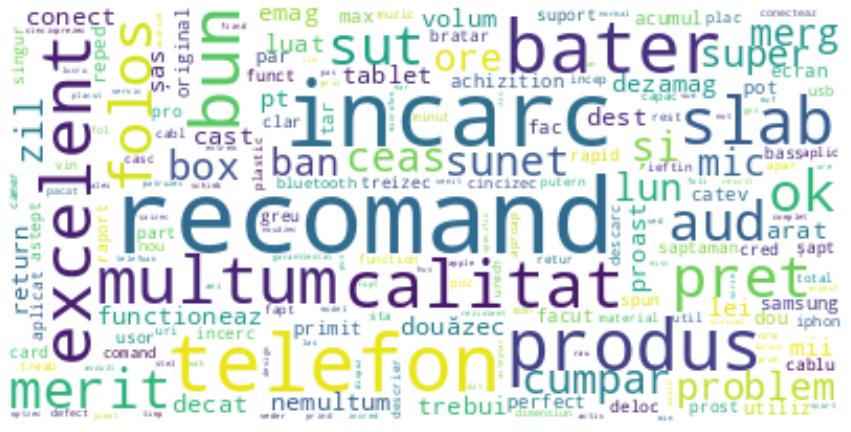

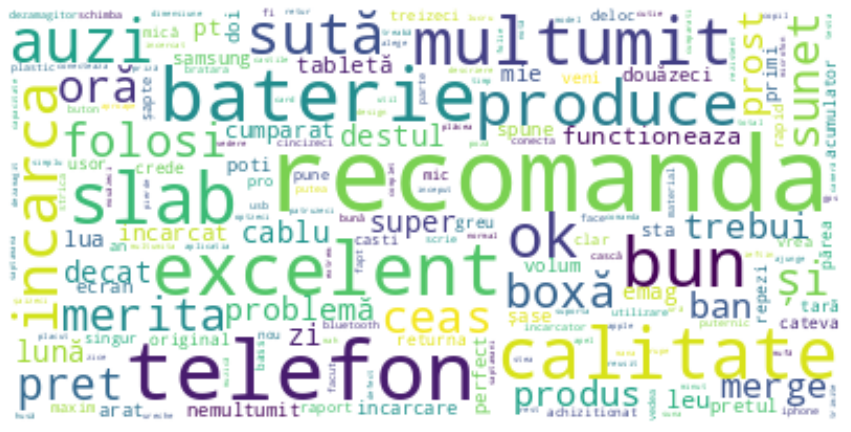

In [15]:
stemmed_frq = defaultdict(lambda: 0)
lematized_frq = defaultdict(lambda: 0)

def add_tokens(frq, arr):
    for i in arr:
        frq[i] += 1

for i in stemmed:
    add_tokens(stemmed_frq, i["title"])
    add_tokens(stemmed_frq, i["content"])
for i in lematized:
    add_tokens(lematized_frq, i["title"])
    add_tokens(lematized_frq, i["content"])

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud_stem = WordCloud(max_font_size=50, max_words=1000, background_color="white")
wordcloud_picture_stemmed = wordcloud_stem.generate_from_frequencies(stemmed_frq)
wordcloud_lem = WordCloud(max_font_size=50, max_words=1000, background_color="white")
wordcloud_picture_lematized = wordcloud_lem.generate_from_frequencies(lematized_frq)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud_picture_stemmed, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud_picture_lematized, interpolation='bilinear')
plt.axis('off')
plt.show()

# observam ca majoritatea cuvintelor care apar des in stemming apar si in lematizare.

3. Plotati distributia numarului de tokens per review (nr. de reviews vs. nr. de tokens), atat pentru review-urile negative, cat si, separat, pentru cele pozitive. Ce observati?

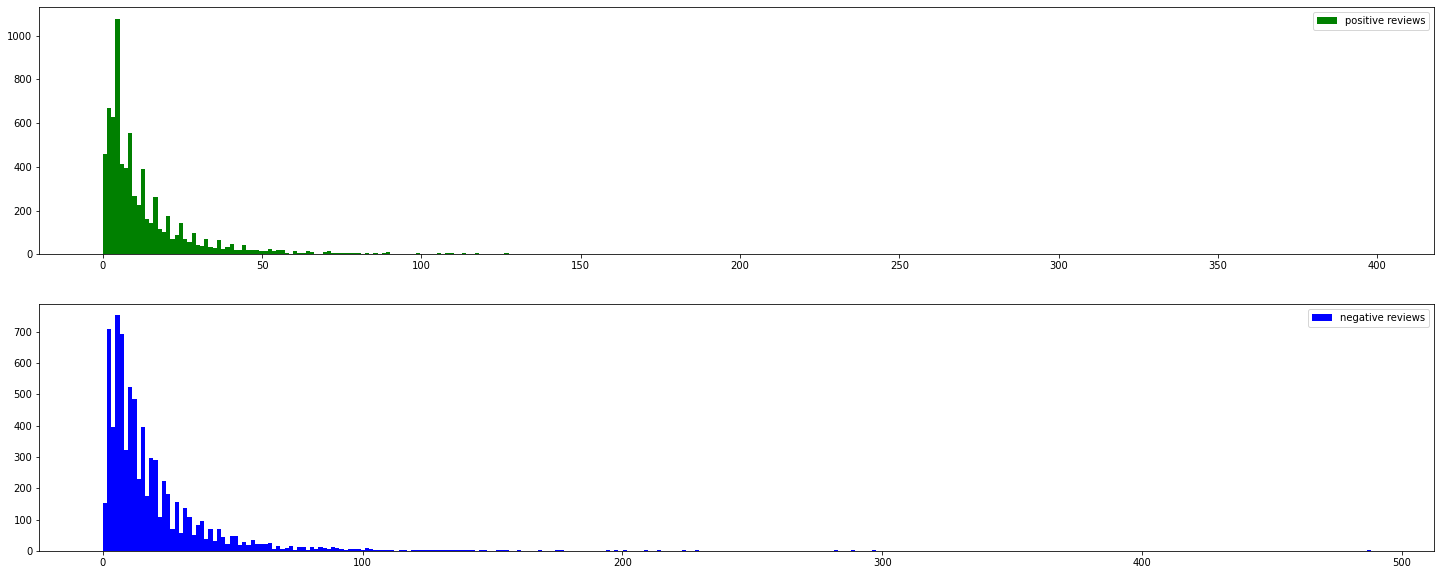

In [16]:
# nr of tokens in positive / negative reviews
positive_nr_tokens = []
negative_nr_tokens = []

# all reviews are stacked in the same list, where
# `nr_positive_reviews` is the number of positive reviews.
for poz_rev in all_reviews[:nr_positive_reviews]:
    positive_nr_tokens.append(len(poz_rev["content"]))

for neg_rev in all_reviews[nr_positive_reviews:]:
    negative_nr_tokens.append(len(neg_rev["content"]))


# tweets_stopwords = [word for word in all_words if word in stop_words_spacy]
# values, frequencies = np.unique(tweets_stopwords, return_counts=True)
# stopwords_dict = {value: freq for value, freq in zip(values, frequencies)}

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(25, 10))
ax[0].hist(positive_nr_tokens, bins=300, color='g', label="positive reviews")
ax[1].hist(negative_nr_tokens, bins=300, color='b', label="negative reviews")
ax[0].legend()
ax[1].legend()
plt.show()

# Reviewurile negative par in medie sa aiba putin mai multe tokenuri.